In [1]:
import numpy as np
import scipy as sp
import skimage as sk
import matplotlib.pyplot as plt

# RGB vs Grayscale vs Black & White

In [2]:
img = sk.io.imread("https://i.pinimg.com/originals/44/0c/28/440c28afcf6a822584561d81653f239c.png")
type(img), img.shape, img.min(), img.max()

(numpy.ndarray, (512, 512, 3), 0, 255)

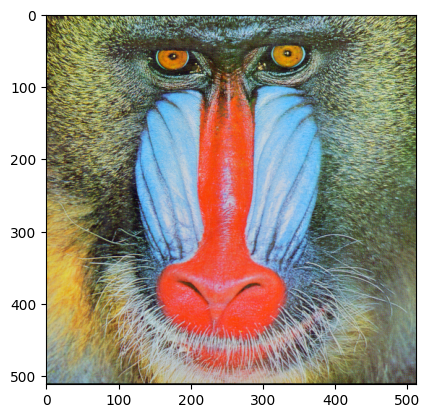

In [3]:
plt.imshow(img)

In [4]:
R = img[:,:,0]
G = img[:,:,1]
B = img[:,:,2]

img_gray = sk.color.rgb2gray(img) #same as 0.2989*R  + 0.5870*G  + 0.1140*B
img_BW   = (img_gray>=0.5)*1

(-0.5, 1535.5, 511.5, -0.5)

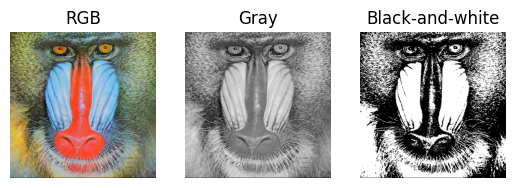

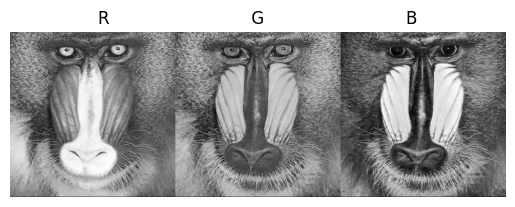

In [5]:
ax1 = plt.subplot(1,3,1)
ax1.imshow(img)
plt.title('RGB')
ax1.axis('off')

ax2 = plt.subplot(1,3,2)
ax2.imshow(img_gray,'gray')
plt.title('Gray')
ax2.axis('off')

ax3 = plt.subplot(1,3,3)
ax3.imshow(img_BW,'gray')
plt.title('Black-and-white')
ax3.axis('off')

plt.figure()
plt.imshow(np.concatenate((R,G,B),axis=1),'gray')
plt.title('R                           G                           B')
plt.axis('off')

# Inverse vs Power vs Root

In [6]:
import os
path = r'/content/spatial_processing_images-1'
img = plt.imread(os.path.join(path, 'mamo_xray.tif'))

((571, 482), 21, 255)

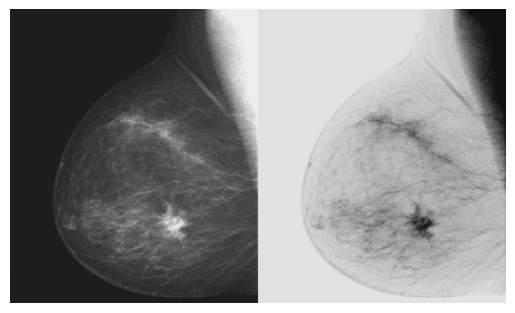

In [7]:
plt.imshow(np.concatenate((img,-img),axis=1),'gray')
plt.axis('off')
img.shape, img.min(),img.max()

((769, 765), 0, 255)

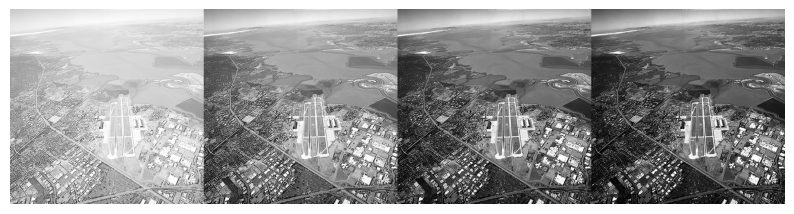

In [8]:
img = plt.imread(os.path.join(path, 'washed_out_aerial.tif'))
plt.figure(figsize=(10,10))
plt.imshow(np.concatenate((img/255,(img/255)**2.5,(img/255)**4,(img/255)**5),axis=1),'gray')
plt.axis('off')

img.shape, img.min(),img.max()

((976, 746), 0, 255)

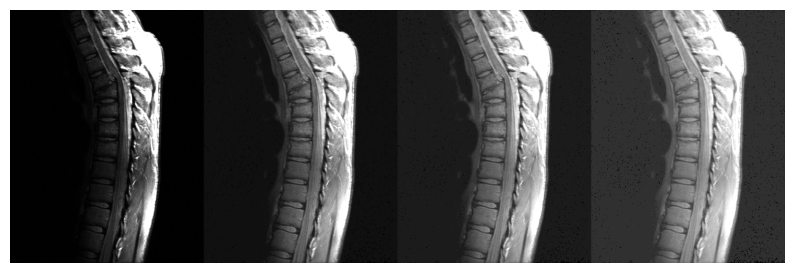

In [9]:
img = plt.imread(os.path.join(path, 'fractured_spine.tif'))

plt.figure(figsize=(10,10))
plt.imshow(np.concatenate((img/255,(img/255)**0.5,(img/255)**0.4,(img/255)**0.3),axis=1),'gray')
plt.axis('off')

img.shape, img.min(),img.max()

# Histogram & Equalizations

((132, 255), (91, 138), (0, 255), (13, 83))

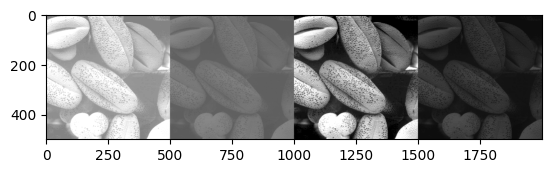

In [10]:
img1 = plt.imread(os.path.join(path, 'bean_1.tif'))
img2 = plt.imread(os.path.join(path, 'bean_2.tif'))
img3 = plt.imread(os.path.join(path, 'bean_3.tif'))
img4 = plt.imread(os.path.join(path, 'bean_4.tif'))

plt.imshow(np.concatenate((img1,img2,img3,img4),axis=1),'gray')
(img1.min(),img1.max()),(img2.min(),img2.max()),(img3.min(),img3.max()),(img4.min(),img4.max())

In [11]:
range1 = img1.max()-img1.min()
range2 = img2.max()-img2.min()
range3 = img3.max()-img3.min()
range4 = img4.max()-img4.min()


hist1 = np.histogram(img1.reshape(-1),range1)
hist2 = np.histogram(img2.reshape(-1),range2)
hist3 = np.histogram(img3.reshape(-1),range3)
hist4 = np.histogram(img4.reshape(-1),range4)

(0.0, 255.0, 0.0, 25000.0)

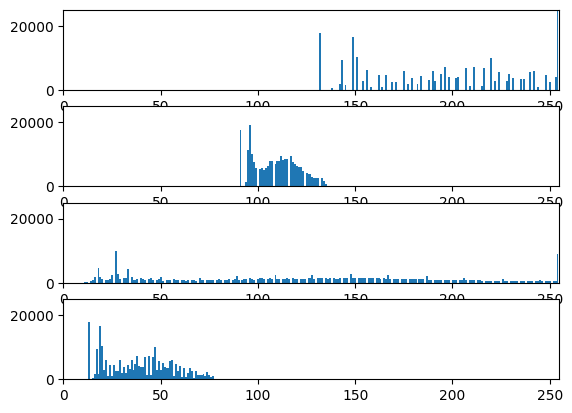

In [12]:
plt.subplot(4,1,1)
plt.bar(list(range(img1.min(),img1.max())),hist1[0],width=1)
plt.axis([0,255, 0, 25000])

plt.subplot(4,1,2)
plt.bar(list(range(img2.min(),img2.max())),hist2[0],width=1)
plt.axis([0,255, 0, 25000])

plt.subplot(4,1,3)
plt.bar(list(range(img3.min(),img3.max())),hist3[0],width=1)
plt.axis([0,255, 0, 25000])

plt.subplot(4,1,4)
plt.bar(list(range(img4.min(),img4.max())),hist4[0],width=1)
plt.axis([0,255, 0, 25000])


(0.0, 255.0, 0.0, 25000.0)

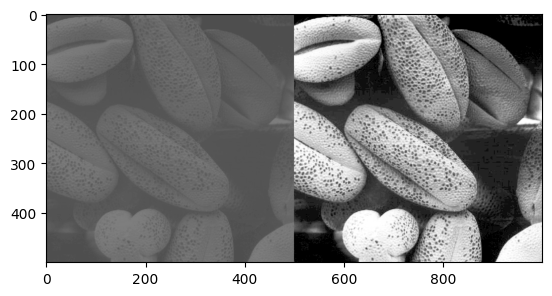

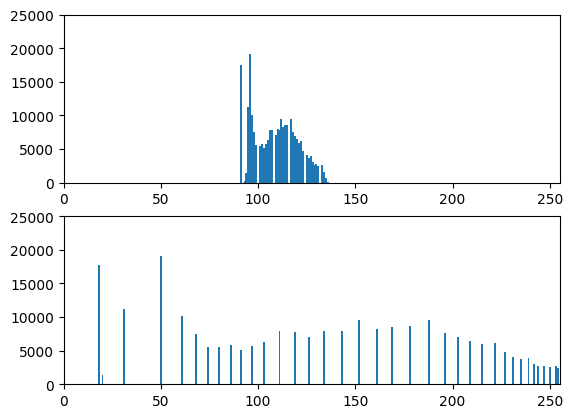

In [13]:
img2_eq = np.round(sk.exposure.equalize_hist(img2.reshape(-1)).reshape(500,500)*255) # for high contrast

plt.imshow(np.concatenate((img2,img2_eq),axis=1),'gray')

plt.figure()

plt.subplot(2,1,1)
plt.bar(list(range(img2.min(),img2.max())),hist2[0],width=1)
plt.axis([0,255, 0, 25000])


range2_eq = int(img2_eq.max()-img2_eq.min())
hist2_eq = np.histogram(img2_eq.reshape(-1),range2_eq)

plt.subplot(2,1,2)
plt.bar(list(range(int(img2_eq.min()),int(img2_eq.max()))),hist2_eq[0],width=1)
plt.axis([0,255, 0, 25000])

# Thresholding

In [14]:
img = plt.imread(os.path.join(path, 'aortic.tif'))
img.shape, img.max(), img.min()

((828, 720), 230, 0)

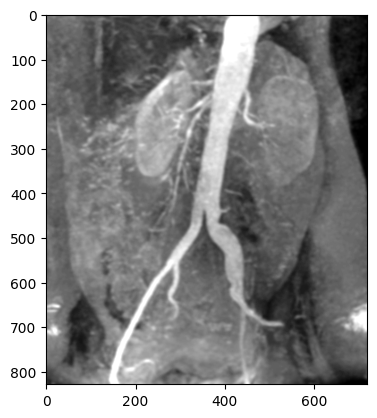

In [15]:
plt.imshow(img/255, 'gray')

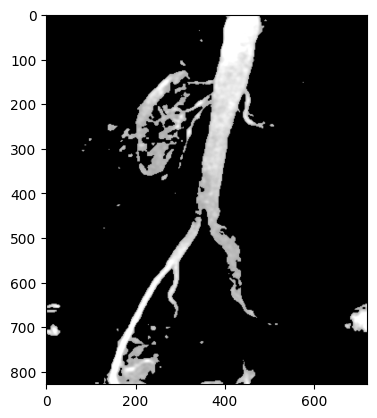

In [16]:
plt.imshow(((img/255>=0.6)*img),'gray')

# Filtering

In [17]:
img = plt.imread(os.path.join(path, 'cameraman.tif'))

img.shape, img.max(), img.min()

((512, 512), 255, 0)

(-0.5, 1023.5, 511.5, -0.5)

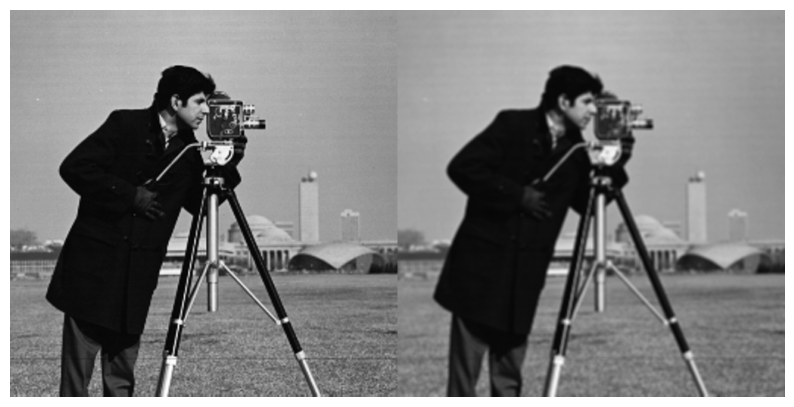

In [18]:
kernel = np.ones((5,5))/25
img_filter = sp.ndimage.convolve(img,kernel)

plt.figure(figsize=(10,10))
plt.imshow(np.concatenate((img,img_filter),axis=1),'gray')
plt.axis('off')

In [19]:
lap4p = np.array([[0,-1,0],[-1,4,-1],[0,-1,0]])/9
lap4n = lap4p*-1
lap8p = np.array([[-1,-1,-1],[-1,8,-1],[-1,-1,-1]])/9
lap8n = lap8p*-1

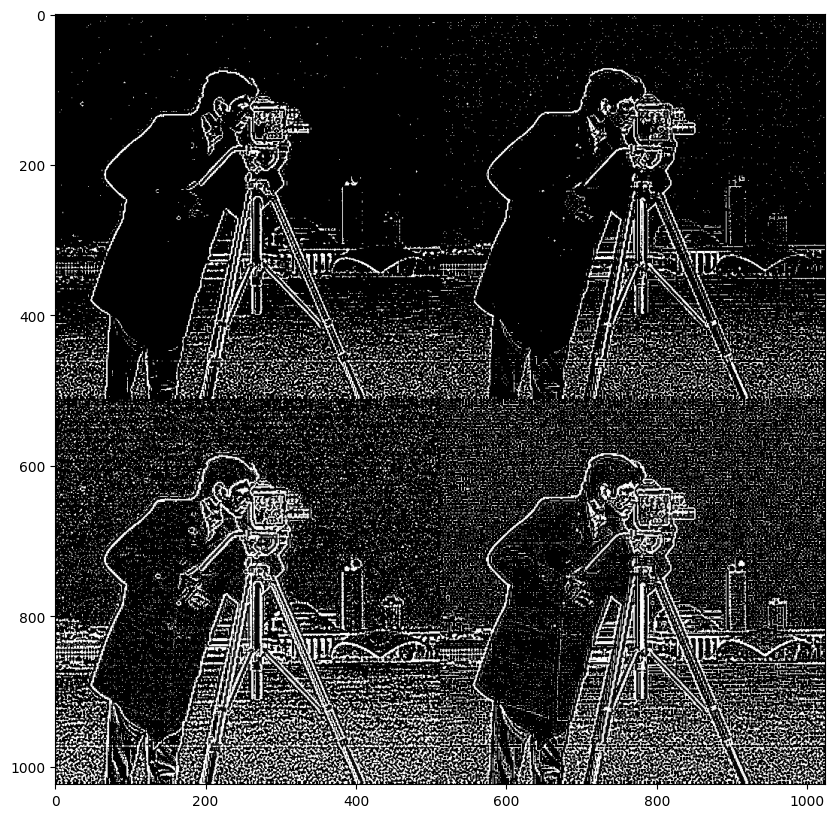

In [20]:
plt.figure(figsize=(10,10))
img_l4p = sp.ndimage.convolve(img, lap4p)
img_l4n = sp.ndimage.convolve(img, lap4n)
img_l8p = sp.ndimage.convolve(img, lap8p)
img_l8n = sp.ndimage.convolve(img, lap8n)
plt.imshow(np.concatenate((np.concatenate((img_l4p,img_l4n),axis=1),
                           np.concatenate((img_l8p,img_l8n),axis=1)),axis=0),'gray')


In [21]:
img = plt.imread(os.path.join(path, 'blurry_moon.tif'))
img = img/255
img.shape, img.max(), img.min()

((540, 466), 0.996078431372549, 0.0)

In [22]:
#lap4p = np.array([[0,-1,0],[-1,4,-1],[0,-1,0]])
lap4p = np.array([[0,-1,0],[-1,4,-1],[0,-1,0]])/9
lap4n = lap4p*-1
lap8p = np.array([[-1,-1,-1],[-1,8,-1],[-1,-1,-1]])/9
lap8n = lap8p*-1

In [23]:
kernel = np.ones((3,3))/25

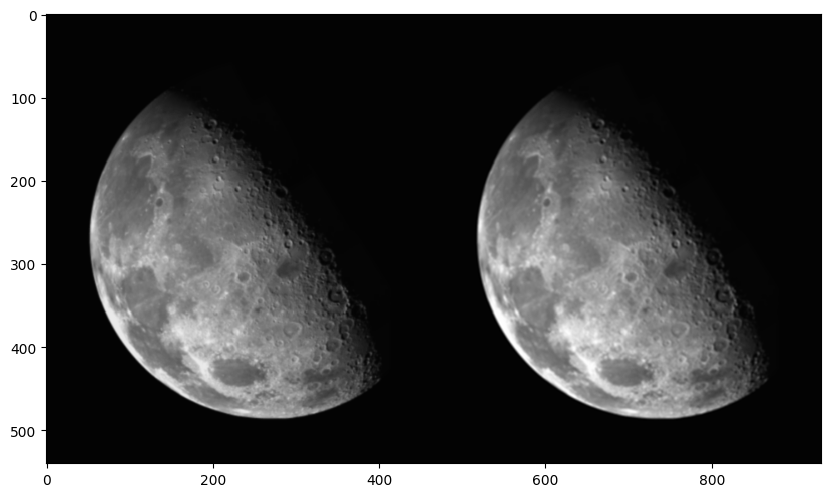

In [24]:
#img_lap = sp.ndimage.convolve(img,lap4n)
#img_lap = sp.ndimage.convolve(img,lap8n)
img_lap = sp.ndimage.convolve(img,lap4p)

plt.figure(figsize=(10,10))
img_final = sp.ndimage.convolve(img + img_lap*3, kernel)

plt.imshow(np.concatenate((img, img_final*3),axis=1),'gray')

In [25]:
img = plt.imread(os.path.join(path, 'coins.bmp'))
img = img/1.
img.shape, img.max(), img.min()

((242, 308, 3), 255.0, 56.0)

In [26]:
print(img.shape)
p = 0.025

H,W,C = img.shape
hs = np.random.randint(0,H,int(H*W*p/2))
ws = np.random.randint(0,W,int(H*W*p/2))

hp = np.random.randint(0,H,int(H*W*p/2))
wp = np.random.randint(0,W,int(H*W*p/2))

img_sp = img.copy()
img_sp[hs,ws,:] = 255.
img_sp[hp,wp,:] = 0.

img_med = sk.filters.median(img_sp)

(242, 308, 3)


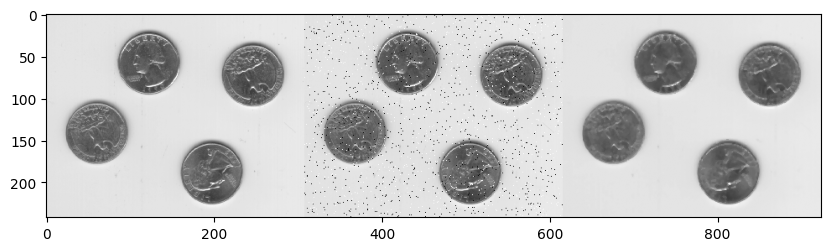

In [27]:
plt.figure(figsize=(10,10))
plt.imshow(np.concatenate((img/255,img_sp/255,img_med/255),axis=1))

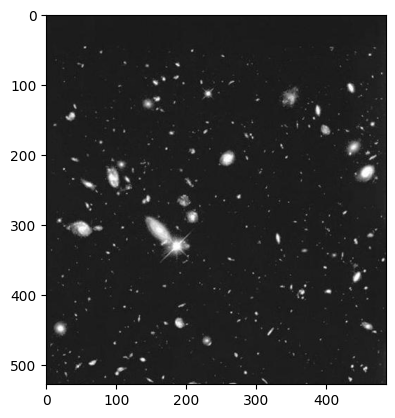

In [28]:
img = plt.imread(os.path.join(path, 'hubble.tif'))
img = img/255
img.shape, img.max(), img.min()
plt.imshow(img, 'gray')

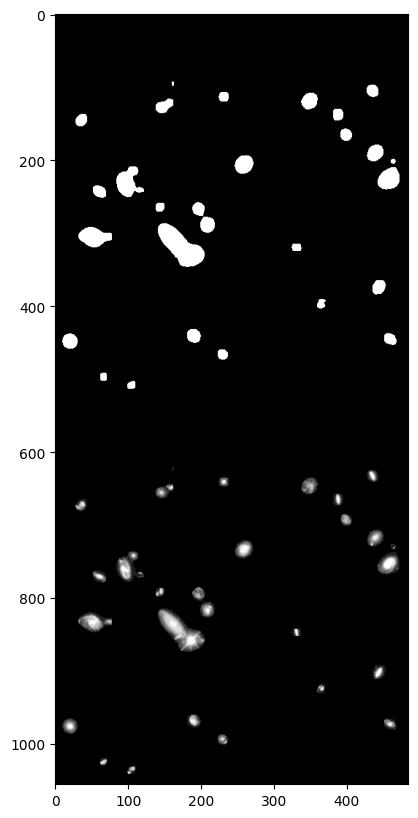

In [29]:
kernel = np.ones((15,15))/225
plt.figure(figsize=(10,10))
img_filter = sp.ndimage.convolve(img,kernel)
img2 = img_filter >=0.25
#plt.imshow(img2, 'gray')

img3 = (img_filter>= 0.25)*img
plt.imshow(np.concatenate((img2, img3), axis = 0), 'gray')